# Exploratory Data Analysis Process

## Reading the data and seting imports


In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/raw/dados_completos_2021_FORD.csv')

## Data anlaysis

In [ ]:
# Checking the data 
df.head(2)

In [46]:
# Printing the data in a way to see all the informations
print(df.head().to_string())


   Year  Make              Model  odiNumber        manufacturer  crash   fire  numberOfInjuries  numberOfDeaths dateOfIncident dateComplaintFiled          vin                                     components                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [3]:
# Printing the data types of each column
df.dtypes

Year                   int64
Make                  object
Model                 object
odiNumber              int64
manufacturer          object
crash                   bool
fire                    bool
numberOfInjuries       int64
numberOfDeaths         int64
dateOfIncident        object
dateComplaintFiled    object
vin                   object
components            object
summary               object
products              object
dtype: object

In [ ]:
# Generating summary numerical columns 
df.describe()

,Year,odiNumber,numberOfInjuries,numberOfDeaths
count,13414.0,1.341400e+04,13414.000000,13414.000000
mean,2021.0,1.153029e+07,0.017146,0.001193
std,0.0,6.090139e+04,0.144497,0.038596
min,2021.0,1.138726e+07,0.000000,0.000000
25%,2021.0,1.148307e+07,0.000000,0.000000
50%,2021.0,1.152723e+07,0.000000,0.000000
75%,2021.0,1.158215e+07,0.000000,0.000000
max,2021.0,1.163813e+07,3.000000,2.000000


In [5]:
# Checking null values in each column
df.isnull().sum()

Year                    0
Make                    0
Model                   0
odiNumber               0
manufacturer            0
crash                   0
fire                    0
numberOfInjuries        0
numberOfDeaths          0
dateOfIncident          0
dateComplaintFiled      0
vin                   144
components              0
summary                 0
products                0
dtype: int64

In [6]:
# Counting the number of unique values 
category_counts = df.nunique()
print(category_counts)

Year                     1
Make                     1
Model                   51
odiNumber             2656
manufacturer             2
crash                    2
fire                     2
numberOfInjuries         4
numberOfDeaths           3
dateOfIncident        1128
dateComplaintFiled    1062
vin                    961
components             295
summary               2606
products                44
dtype: int64


In [8]:
# Exploring the distribution of data to identify patterns or inconsistencies.


columns_to_analyze = [col for col in df.columns if col not in ['odiNumber', 'dateOfIncident','dateComplaintFiled','vin','summary']]
for col in columns_to_analyze:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("\n")

Feature: Year
Year
2021    13414
Name: count, dtype: int64


Feature: Make
Make
FORD    13414
Name: count, dtype: int64


Feature: Model
Model
F-150 SUPER CREW DIESEL                1358
F-150 SUPER CREW HEV                   1358
F-150 SUPER CAB                        1358
F-150 SUPER CREW                       1358
F-150 SUPER CAB DIESEL                 1358
F-150 REGULAR CAB                      1358
ESCAPE                                  576
ESCAPE HEV                              576
MUSTANG MACH-E                          542
EXPLORER                                484
BRONCO SPORT                            405
BRONCO                                  268
ECOSPORT                                262
EXPEDITION                              258
EXPEDITION EL                           258
F-250 REGULAR CAB                       180
F-250 SUPER CAB                         180
F-250 CREW CAB                          180
RANGER SUPER CREW                       122
RANGER SUPER CAB     

In [9]:
# Analyzing the distribution of data in the 'components
df['components'].value_counts()

components
POWER TRAIN                                                                  2304
VISIBILITY                                                                    931
ELECTRICAL SYSTEM                                                             906
UNKNOWN OR OTHER                                                              863
ENGINE                                                                        693
VISIBILITY/WIPER                                                              577
STRUCTURE                                                                     564
SERVICE BRAKES                                                                494
EXTERIOR LIGHTING                                                             385
WHEELS                                                                        276
ENGINE AND ENGINE COOLING                                                     226
STEERING                                                                      196
SUSPE

In [10]:
# Analyzing the distribution of data in the 'Model
df['Model'].value_counts()

Model
F-150 SUPER CREW DIESEL                1358
F-150 SUPER CREW HEV                   1358
F-150 SUPER CAB                        1358
F-150 SUPER CREW                       1358
F-150 SUPER CAB DIESEL                 1358
F-150 REGULAR CAB                      1358
ESCAPE                                  576
ESCAPE HEV                              576
MUSTANG MACH-E                          542
EXPLORER                                484
BRONCO SPORT                            405
BRONCO                                  268
ECOSPORT                                262
EXPEDITION                              258
EXPEDITION EL                           258
F-250 REGULAR CAB                       180
F-250 SUPER CAB                         180
F-250 CREW CAB                          180
RANGER SUPER CREW                       122
RANGER SUPER CAB                        122
EDGE                                     96
F-350 SUPER CAB                          92
F-350 REGULAR CAB         

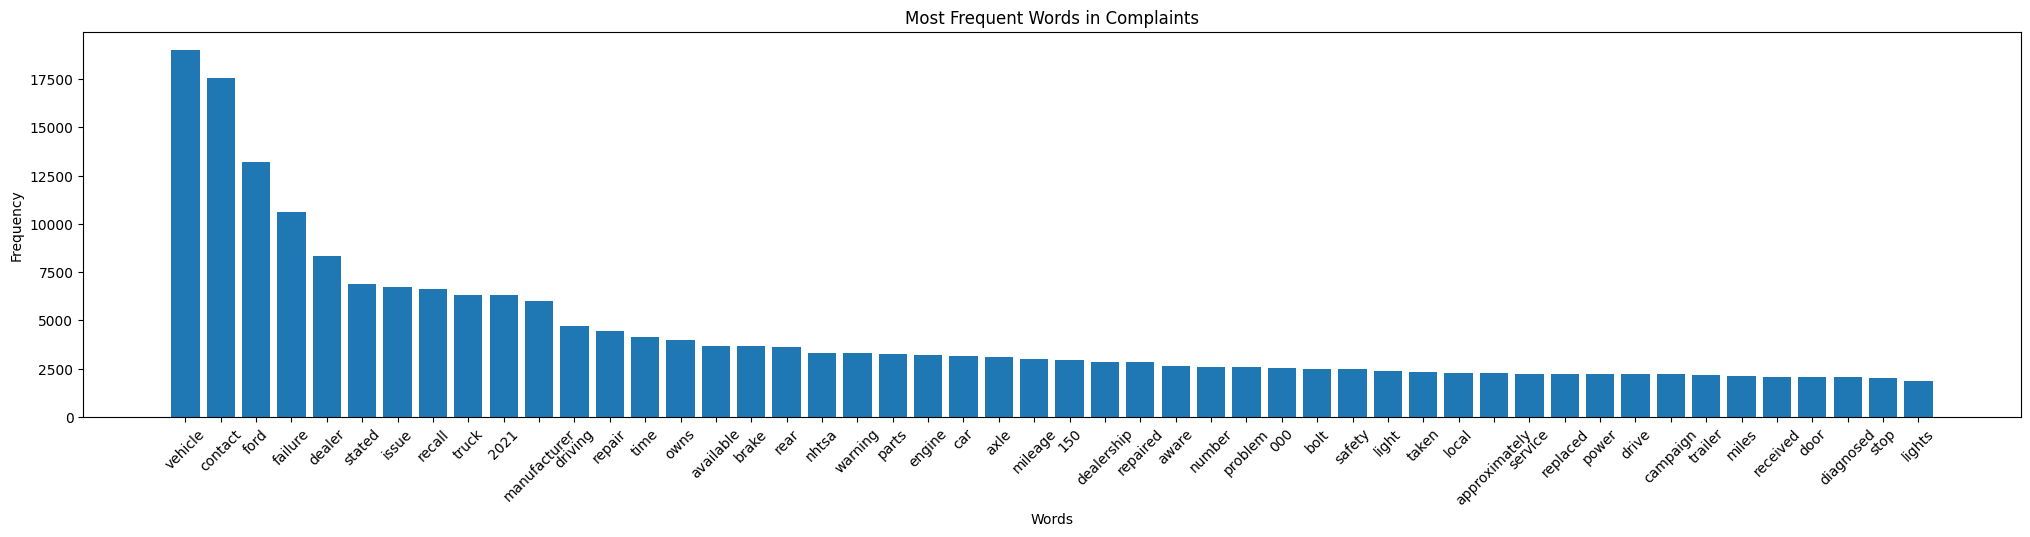

Most Frequent Words in Complaints:
vehicle: 18993
contact: 17536
ford: 13189
failure: 10606
dealer: 8322
stated: 6866
issue: 6746
recall: 6635
truck: 6335
2021: 6318
manufacturer: 6012
driving: 4696
repair: 4447
time: 4143
owns: 3994
available: 3653
brake: 3646
rear: 3628
nhtsa: 3330
parts: 3249
engine: 3208
car: 3158
axle: 3091
mileage: 2974
150: 2947
dealership: 2854
repaired: 2829
aware: 2623
number: 2581
problem: 2573
000: 2543
bolt: 2499
safety: 2496
light: 2356
taken: 2315
local: 2284
approximately: 2258
service: 2216
replaced: 2211
power: 2204
drive: 2203
campaign: 2198
trailer: 2153
miles: 2119
received: 2067
door: 2059
diagnosed: 2049
stop: 2036
lights: 1878


In [ ]:
texts = df['summary'].dropna()  

# Analyzing the most frequent words using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Remove common stopwords and limit to top 50 words
word_counts = vectorizer.fit_transform(texts)  # Transform the text into a matrix of word counts

# Get the most frequent words
words_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))
sorted_words_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)  # Sort words by frequency

# Visualize the most frequent words with a bar chart
plt.figure(figsize=(25, 5))  
plt.bar(*zip(*sorted_words_freq))  
plt.xticks(rotation=45)  
plt.title('Most Frequent Words in Complaints')  
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()  

# Display the most frequent words in the console
print("Most Frequent Words in Complaints:")
for word, freq in sorted_words_freq:
    print(f"{word}: {freq}")


In [27]:
# Number of complaints for each model
complaints_by_model = df.groupby('Model').size().reset_index(name='num_complaints')
print(complaints_by_model.sort_values(by='num_complaints', ascending=False))


                                  Model  num_complaints
20                 F-150 SUPER CREW HEV            1358
19              F-150 SUPER CREW DIESEL            1358
18                     F-150 SUPER CREW            1358
17               F-150 SUPER CAB DIESEL            1358
16                      F-150 SUPER CAB            1358
15                    F-150 REGULAR CAB            1358
8                                ESCAPE             576
9                            ESCAPE HEV             576
40                       MUSTANG MACH-E             542
13                             EXPLORER             484
1                          BRONCO SPORT             405
0                                BRONCO             268
6                              ECOSPORT             262
11                           EXPEDITION             258
12                        EXPEDITION EL             258
23                      F-250 SUPER CAB             180
21                       F-250 CREW CAB         

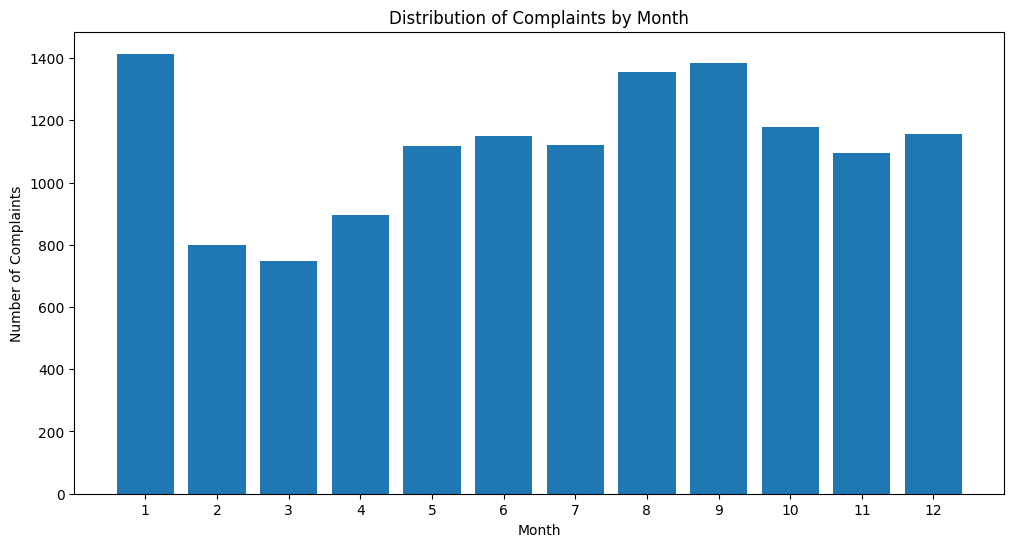

In [48]:
# Check the distribution of complaints by month
df['month_complaint'] = pd.to_datetime(df['dateComplaintFiled']).dt.month  
complaints_by_month = df.groupby('month_complaint').size().reset_index(name='num_complaints') 

# Visualize the number of complaints by month using a bar chart
plt.figure(figsize=(12, 6)) 
plt.bar(complaints_by_month['month_complaint'], complaints_by_month['num_complaints'])
plt.xticks(complaints_by_month['month_complaint'])  
plt.title('Distribution of Complaints by Month')  
plt.xlabel('Month')  
plt.ylabel('Number of Complaints')  
plt.show()  


In [39]:
# Análise de componentes mais frequentemente mencionados
df['components_list'] = df['components'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df_exploded = df.explode('components_list')
components_count = df_exploded['components_list'].value_counts().reset_index(name='count')
components_count.columns = ['Component', 'Count']
print(components_count)

                             Component  Count
0                          POWER TRAIN   3605
1                    ELECTRICAL SYSTEM   2081
2                     UNKNOWN OR OTHER   1534
3                               ENGINE   1418
4                       SERVICE BRAKES   1301
5                           VISIBILITY   1107
6                            STRUCTURE    907
7                     VISIBILITY/WIPER    759
8          FORWARD COLLISION AVOIDANCE    676
9                               WHEELS    589
10                   EXTERIOR LIGHTING    524
11                          SUSPENSION    431
12                            STEERING    429
13              FUEL/PROPULSION SYSTEM    419
14                BACK OVER PREVENTION    408
15               VEHICLE SPEED CONTROL    343
16           ENGINE AND ENGINE COOLING    316
17                      LANE DEPARTURE    216
18                           HYDRAULIC    206
19                           EQUIPMENT    206
20                         FUEL SY